In [6]:
# Identitas Mahasiswa.
# Nama : Muhammad Nadhif Athalla
# NIM : 119140209
# Kelas : Kapita Selekta Informatika RB
# Subject : UTS Kapita Selekta Informatika T.A. 2021-2022

In [7]:
#1) Proses Menginstall Tweepy
pip install tweepy

SyntaxError: invalid syntax (3136837795.py, line 2)

In [8]:
#2) Proses Menginstall library yang dibutuhkan
import pandas as pd
import tweepy as tp
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools
import collections
from textblob import TextBlob
from datetime import date

In [9]:
#3) Proses autentikasi akun twitter
consumer_key = "JBTpt1Ah8rhrEWb15vWaVUwWb"
consumer_secret = "RnSmu3LBb1vWd0IIZmrGkOj7oL7QA2wWhMz6KyOvYuprSADPIx"
access_token = "1504340981491339267-5ZWzJeUWBzH1RlnyFWo85jGPuFXYBP"
access_token_secret = "5r9BIpQuOlmsahpUDyPU0Fj3tqy49d2enArEy7ETCbc3E"

In [11]:
#4) Proses autentikasi akun twitter untuk dapat mengakses API
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth,wait_on_rate_limit=True)

In [13]:
#5) Proses pencarian tweet dengan keyword #JoeBiden
tweets = api.search_tweets(q="#JoeBiden", lang="en", tweet_mode="extended", count=1000)
i = 1
for tweet in tweets[0:5]:
    print(str(i) + ". " + tweet.full_text + "\n")
    i+=1

1. For those in the back of the room, this person was #HunterBiden selling access to #JoeBiden. https://t.co/Sm9c8KrQW2

2. Can we blame #JoeBiden for #WillSmith bit*h slapping #ChrisRock for the #BidenGasHike at least then it would be understandable. https://t.co/6fhTK2fOB2

3. RT @DeborahFordJohn: #morningjoe #joebiden #biden #mika
Thank you for speaking truth! Putin is a war criminal, and your efforts to call for…

4. RT @45Relay: The New York Times just admitted that it participated in an effort to rig the election for Joe Biden.
Read the article by the…

5. RT @sn00pdad: #BREAKING: #JoeBiden now publicly denies saying what everyone heard him say. The #WhiteHouse had to walk it back right after…



In [14]:
#5) Proses transform data menjadi bentuk dataframe sesuai dengan kolom-kolom analisis yang dibutuhkan
tweets_fix = []
for tweet in tweets:
    tweets_fix.append((tweet.created_at, tweet.created_at, tweet.id,tweet.user.screen_name,tweet.full_text))
    df = pd.DataFrame(tweets_fix, columns=["Tanggal_Tweet","Waktu_Tweet","id_Tweet","User_Name","Tweets"])

df

,Tanggal_Tweet,Waktu_Tweet,id_Tweet,User_Name,Tweets
0,2022-03-28 12:26:30+00:00,2022-03-28 12:26:30+00:00,1508420265155477505,TheTruthSekr,"For those in the back of the room, this person..."
1,2022-03-28 12:25:50+00:00,2022-03-28 12:25:50+00:00,1508420095428673541,sn00pdad,Can we blame #JoeBiden for #WillSmith bit*h sl...
2,2022-03-28 12:25:49+00:00,2022-03-28 12:25:49+00:00,1508420091477700615,clinesb,RT @DeborahFordJohn: #morningjoe #joebiden #bi...
3,2022-03-28 12:25:40+00:00,2022-03-28 12:25:40+00:00,1508420053108101126,ertel_michael,RT @45Relay: The New York Times just admitted ...
4,2022-03-28 12:25:30+00:00,2022-03-28 12:25:30+00:00,1508420010846396424,JustAGirlXjs,RT @sn00pdad: #BREAKING: #JoeBiden now publicl...
...,...,...,...,...,...
95,2022-03-28 11:07:21+00:00,2022-03-28 11:07:21+00:00,1508400346397552641,ShreyaNimbhorka,RT @goboheadTW: Let Will Smith deal with Putin...
96,2022-03-28 11:05:53+00:00,2022-03-28 11:05:53+00:00,1508399975872487431,CharlaWash,RT @ElAmerican_: #BREAKING | Biden's approval ...
97,2022-03-28 11:05:43+00:00,2022-03-28 11:05:43+00:00,1508399933266993156,collapse2024,"Anyone That Voted For #JoeBiden lacks wisdom, ..."
98,2022-03-28 11:05:35+00:00,2022-03-28 11:05:35+00:00,1508399900458901518,goboheadTW,Let Will Smith deal with Putin and Biden can g...


In [15]:
#6) Proses pembersihan isi dataframe untuk kolom tanggal, waktu, dan isi dari tweet tersebut sesuai dengan kebutuhkan analisis
def clean_text(text):
    text = re.sub(r'@[0-9A-Za-z]+','', text)
    text = re.sub(r'#','', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    text = re.sub(r'[^0-9A-Za-z \t]','', text)
    text = re.sub(r'(\w+:\/\/\S+)','', text)
    return text

def clean_date(date):
    date_result = date.strftime("%Y-%m-%d")
    return date_result

def clean_time(time):
    time_result = time.strftime("%H:%M:%S")
    return time_result

df['Tweets'] = df['Tweets'].apply(clean_text)
df['Tanggal_Tweet'] = df['Tanggal_Tweet'].apply(clean_date)
df['Waktu_Tweet'] = df['Waktu_Tweet'].apply(clean_time)
df

,Tanggal_Tweet,Waktu_Tweet,id_Tweet,User_Name,Tweets
0,2022-03-28,12:26:30,1508420265155477505,TheTruthSekr,For those in the back of the room this person ...
1,2022-03-28,12:25:50,1508420095428673541,sn00pdad,Can we blame JoeBiden for WillSmith bith slapp...
2,2022-03-28,12:25:49,1508420091477700615,clinesb,morningjoe joebiden biden mikaThank you for s...
3,2022-03-28,12:25:40,1508420053108101126,ertel_michael,The New York Times just admitted that it part...
4,2022-03-28,12:25:30,1508420010846396424,JustAGirlXjs,BREAKING JoeBiden now publicly denies saying ...
...,...,...,...,...,...
95,2022-03-28,11:07:21,1508400346397552641,ShreyaNimbhorka,Let Will Smith deal with Putin and Biden can ...
96,2022-03-28,11:05:53,1508399975872487431,CharlaWash,BREAKING Bidens approval rating falls to rec...
97,2022-03-28,11:05:43,1508399933266993156,collapse2024,Anyone That Voted For JoeBiden lacks wisdom an...
98,2022-03-28,11:05:35,1508399900458901518,goboheadTW,Let Will Smith deal with Putin and Biden can g...


In [16]:
#7) Proses penambahan kolom polarity dengan menggunakan library texblob untuk menilai polaritas dari isi tweet tersebut 
def thePolarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Polarity'] = df['Tweets'].apply(thePolarity)
df

,Tanggal_Tweet,Waktu_Tweet,id_Tweet,User_Name,Tweets,Polarity
0,2022-03-28,12:26:30,1508420265155477505,TheTruthSekr,For those in the back of the room this person ...,0.000000
1,2022-03-28,12:25:50,1508420095428673541,sn00pdad,Can we blame JoeBiden for WillSmith bith slapp...,-0.300000
2,2022-03-28,12:25:49,1508420091477700615,clinesb,morningjoe joebiden biden mikaThank you for s...,-0.400000
3,2022-03-28,12:25:40,1508420053108101126,ertel_michael,The New York Times just admitted that it part...,0.136364
4,2022-03-28,12:25:30,1508420010846396424,JustAGirlXjs,BREAKING JoeBiden now publicly denies saying ...,0.095238
...,...,...,...,...,...,...
95,2022-03-28,11:07:21,1508400346397552641,ShreyaNimbhorka,Let Will Smith deal with Putin and Biden can ...,0.000000
96,2022-03-28,11:05:53,1508399975872487431,CharlaWash,BREAKING Bidens approval rating falls to rec...,0.000000
97,2022-03-28,11:05:43,1508399933266993156,collapse2024,Anyone That Voted For JoeBiden lacks wisdom an...,-0.050000
98,2022-03-28,11:05:35,1508399900458901518,goboheadTW,Let Will Smith deal with Putin and Biden can g...,0.000000


In [17]:
#8) Proses penambahan kolom subjectivity dengan menggunakan library texblob untuk menilai subjektivitas dari isi tweet tersebut 
def theSubjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

df['Subjectivity'] = df['Tweets'].apply(theSubjectivity)
df

,Tanggal_Tweet,Waktu_Tweet,id_Tweet,User_Name,Tweets,Polarity,Subjectivity
0,2022-03-28,12:26:30,1508420265155477505,TheTruthSekr,For those in the back of the room this person ...,0.000000,0.000000
1,2022-03-28,12:25:50,1508420095428673541,sn00pdad,Can we blame JoeBiden for WillSmith bith slapp...,-0.300000,0.400000
2,2022-03-28,12:25:49,1508420091477700615,clinesb,morningjoe joebiden biden mikaThank you for s...,-0.400000,0.550000
3,2022-03-28,12:25:40,1508420053108101126,ertel_michael,The New York Times just admitted that it part...,0.136364,0.454545
4,2022-03-28,12:25:30,1508420010846396424,JustAGirlXjs,BREAKING JoeBiden now publicly denies saying ...,0.095238,0.200794
...,...,...,...,...,...,...,...
95,2022-03-28,11:07:21,1508400346397552641,ShreyaNimbhorka,Let Will Smith deal with Putin and Biden can ...,0.000000,0.000000
96,2022-03-28,11:05:53,1508399975872487431,CharlaWash,BREAKING Bidens approval rating falls to rec...,0.000000,0.300000
97,2022-03-28,11:05:43,1508399933266993156,collapse2024,Anyone That Voted For JoeBiden lacks wisdom an...,-0.050000,0.400000
98,2022-03-28,11:05:35,1508399900458901518,goboheadTW,Let Will Smith deal with Putin and Biden can g...,0.000000,0.000000


In [18]:
#9) Proses penambahan kolom Analysis_Result berdasarkan kolom polaritas untuk menganalisis sentimen dari tweet tersebut
def theAnalysis(polarity_score):
    if polarity_score > 0.0:
        return "Positive"
    elif polarity_score == 0.0:
        return "Netral"
    else:
        return "Negative"

df['Analysis_Result'] = df['Polarity'].apply(theAnalysis)
df

,Tanggal_Tweet,Waktu_Tweet,id_Tweet,User_Name,Tweets,Polarity,Subjectivity,Analysis_Result
0,2022-03-28,12:26:30,1508420265155477505,TheTruthSekr,For those in the back of the room this person ...,0.000000,0.000000,Netral
1,2022-03-28,12:25:50,1508420095428673541,sn00pdad,Can we blame JoeBiden for WillSmith bith slapp...,-0.300000,0.400000,Negative
2,2022-03-28,12:25:49,1508420091477700615,clinesb,morningjoe joebiden biden mikaThank you for s...,-0.400000,0.550000,Negative
3,2022-03-28,12:25:40,1508420053108101126,ertel_michael,The New York Times just admitted that it part...,0.136364,0.454545,Positive
4,2022-03-28,12:25:30,1508420010846396424,JustAGirlXjs,BREAKING JoeBiden now publicly denies saying ...,0.095238,0.200794,Positive
...,...,...,...,...,...,...,...,...
95,2022-03-28,11:07:21,1508400346397552641,ShreyaNimbhorka,Let Will Smith deal with Putin and Biden can ...,0.000000,0.000000,Netral
96,2022-03-28,11:05:53,1508399975872487431,CharlaWash,BREAKING Bidens approval rating falls to rec...,0.000000,0.300000,Netral
97,2022-03-28,11:05:43,1508399933266993156,collapse2024,Anyone That Voted For JoeBiden lacks wisdom an...,-0.050000,0.400000,Negative
98,2022-03-28,11:05:35,1508399900458901518,goboheadTW,Let Will Smith deal with Putin and Biden can g...,0.000000,0.000000,Netral


<AxesSubplot:title={'center':'Date Tweet Visualization'}>

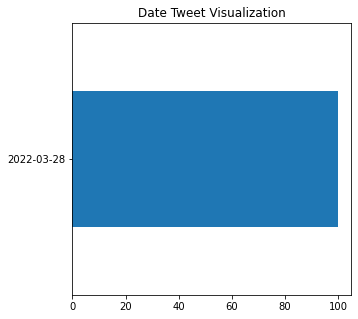

In [19]:
#10) Proses visualisasi tanggal dari tweet-tweet tersebut
fds = df.loc[:len(df)]
plt.title('Date Tweet Visualization')
fds["Tanggal_Tweet"].value_counts().plot(kind="barh", figsize=(5,5))

<AxesSubplot:title={'center':'Time Tweet Visualization'}>

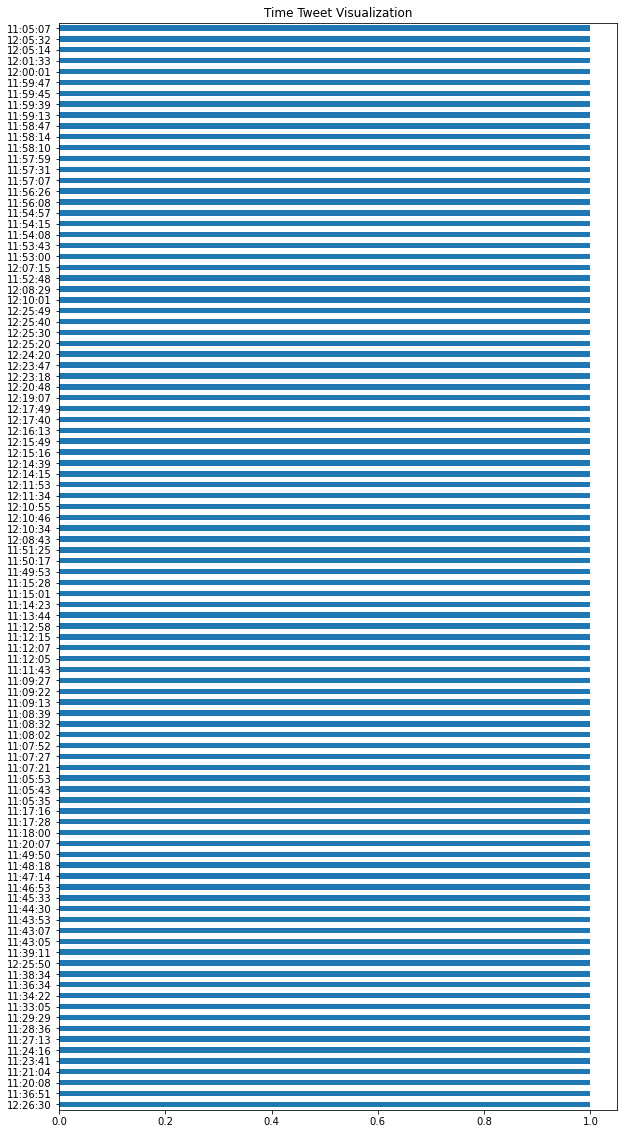

In [20]:
#11) Proses visualisasi waktu dari tweet-tweet tersebut
fds = df.loc[:len(df)]
plt.title('Time Tweet Visualization')
fds["Waktu_Tweet"].value_counts().plot(kind="barh", figsize=(10,20))

<AxesSubplot:title={'center':'User Name Visualization'}, ylabel='User_Name'>

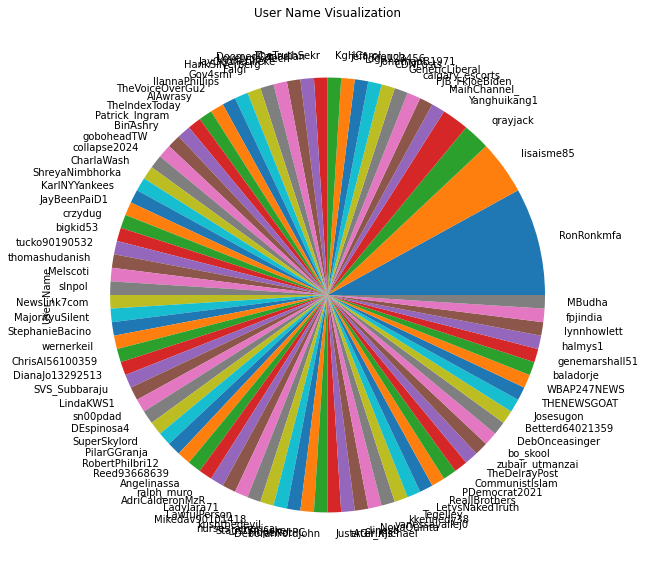

In [21]:
#12) Proses visualisasi user name dari tweet-tweet tersebut
fds = df.loc[:len(df)]
plt.title('User Name Visualization')
fds["User_Name"].value_counts().plot(kind="pie", figsize=(10,10))

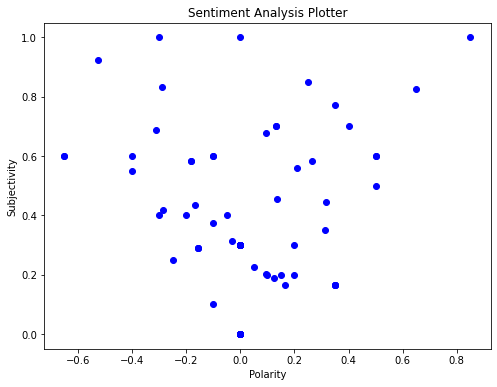

In [22]:
#13) Proses plotting dari berdasarkan polaritas dan subjektivitas dari tweet-tweet tersebut
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color="Blue")
    
plt.title('Sentiment Analysis Plotter')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [23]:
#14) Proses kalkulasi jumlah sentimen positif, negatif, dan netral dari isi tweet-tweet tersebut
positive_percentage = df[df.Analysis_Result == 'Positive']
positive_percentage = positive_percentage['Tweets']

negative_percentage = df[df.Analysis_Result == 'Negative']
negative_percentage = negative_percentage['Tweets']

netral_percentage = df[df.Analysis_Result == 'Netral']
netral_percentage = netral_percentage['Tweets']


positive_result = round((positive_percentage.shape[0] / df.shape[0]) * 100, 1)
negative_result = round((negative_percentage.shape[0] / df.shape[0]) * 100, 1)
netral_result = round((netral_percentage.shape[0] / df.shape[0]) * 100, 1)

print("Sentimen positif dalam tweet tentang tokoh tersebut sebanyak = ", positive_result)
print("Sentimen negative dalam tweet tentang tokoh tersebut sebanyak = ", negative_result)
print("Sentimen netral dalam tweet tentang tokoh tersebut sebanyak = ", netral_result)

Sentimen positif dalam tweet tentang tokoh tersebut sebanyak =  28.0
Sentimen negative dalam tweet tentang tokoh tersebut sebanyak =  24.0
Sentimen netral dalam tweet tentang tokoh tersebut sebanyak =  48.0


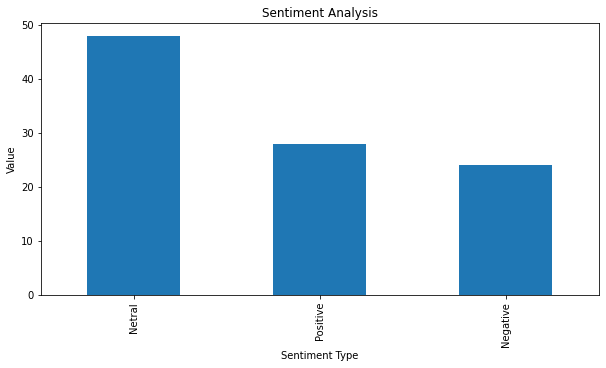

In [24]:
#15) Proses visualisasi jumlah sentimen positif, negatif, dan netral dari isi tweet-tweet tersebut
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Type')
plt.ylabel('Value')
df['Analysis_Result'].value_counts().plot(kind="bar", figsize=(10,5))
plt.show()

In [25]:
#16) Proses perhitungan kata-kata dari isi tweet-tweet tersebut

# Memproses kata-kata didalam tweet tersebut
words = [tweet.lower().split() for tweet in df['Tweets']]

# Membuat list dari kata-kata didalam tweet tersebut 
all_words = list(itertools.chain(*words))

# Membuat perhitungan jumlah kata
count_words = collections.Counter(all_words)
count_words.most_common(15)

[('joebiden', 80),
 ('the', 76),
 ('in', 53),
 ('to', 53),
 ('is', 41),
 ('of', 38),
 ('and', 34),
 ('for', 28),
 ('biden', 23),
 ('a', 23),
 ('you', 22),
 ('this', 15),
 ('that', 15),
 ('it', 14),
 ('what', 14)]

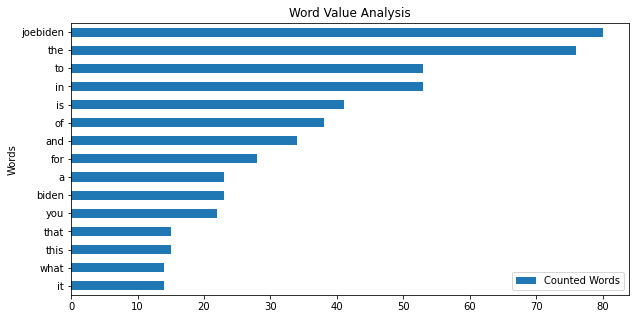

In [26]:
#17) Proses visualisasi kata-kata yang paling sering muncul dari isi tweet-tweet tersebut
words_result = pd.DataFrame(count_words.most_common(15), columns=['Words', 'Counted Words'])
words_result.sort_values(by='Counted Words').plot(kind='barh', title='Word Value Analysis', 
                                                  x='Words', y='Counted Words', figsize=(10,5))
plt.show()

In [27]:
#18) Proses transform data kedalam format csv file
df.to_csv('119140209_RB.csv', index=False)